# Gravitační zákon

$$
\vec{F_{12}} = -G \frac{m_{1}m_{2}}{|\vec{r_{2}} - \vec{r_{1}}|^{2}} \frac{\vec{r_{2}} - \vec{r_{1}}}{|\vec{r_{2}} - \vec{r_{1}}|}
$$
Kde druhá část představuje výpočet jendotkového vektoru a zbylé části představují vektory polohové vektory jednotlivých těles. Symboly hmotnosti jsou zřejmě. Velikost spočítáme tak, že pomineme 
jednotkový vektor.

## Tíhové zrychlení
$$
F_{g} = G\frac{M m}{R_{z}^{2}} = ma
$$
$$
a_{g} = G \frac{M}{R_{z^{2}}}
$$
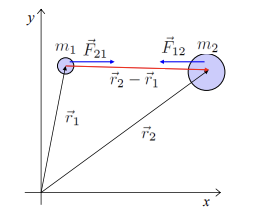

## Odvození kosmické rychlost:
$$
\frac{dx}{ds} = \frac{2R -ds}{dx}
(dx)^2 = 2R ds - ds^2 
$$
$ds^2$ je velmi malé a zanedbáme ho.
$$
dx = \sqrt{2R ds}
v dt = \sqrt{2R \frac{1}{2} g dt^2 } 
 v =\sqrt{Rg}=\sqrt{\frac{MG}{R} 
$$
Rychlost, kterou je třeba mít, abych unikl přitažlivé síle Země. Jinými slovy, abych "létal kolem Země", aniž bych se dotkl jejího povrchu
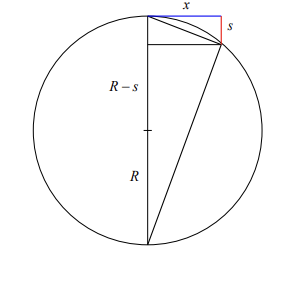

# Pád nějakého tělesa obíhajícího Zemi
Např.: Měsíc

$$
s_{M} = \frac{1}{2}a_{M}t^{2}
$$
Kde $a_{M}$ je gravitační zrychlení měsíce. Spočítáme jej pomocí následující úvahy:

$$
a_{M} = \frac{M_{Z}}{R_{M}^{2}} G
$$
\
$$
g = \frac{M_{Z}}{R_{Z}^{2}} G
$$
\
$$
G = \frac{R^{2}g}{M_{Z}} => a_{M} = (\frac{R_{Z}}{R_{M}})^{2} g
$$
Odsud potom:
$$
s_{M} = \frac{1}{2}(\frac{R_{Z}}{R_{M}})^{2} g t^{2}
$$

## Cavendish experiment

Podívat se na to

In [4]:
# Simulace obletu kolem Země
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import G
print(G)

6.6743e-11


[1.0e-06 6.4e+06]
1e-06


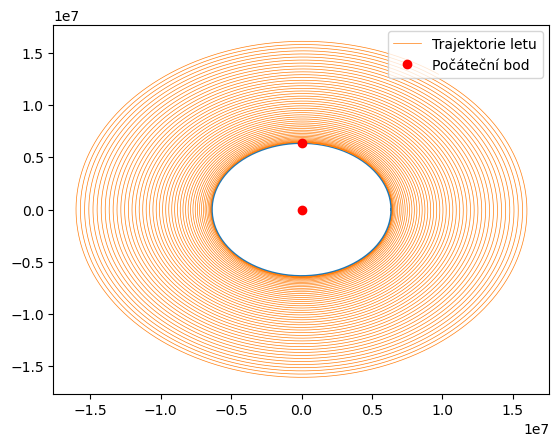

In [143]:

M_planet = 5.972e24 #Hmotnost Země
#Pozn: daná planeta je vždy v počátku souřadnic
def gravitace_a(polovector,M_planet):
    velikost_vektoru = np.dot(polovector,polovector)
    velikost_zrychleni = (G*(M_planet)/(velikost_vektoru))
    # print(velikost_zrychleni)
    smer = polovector/np.sqrt(velikost_vektoru)
#    print(smer)
    return(velikost_zrychleni*(polovector/np.sqrt(velikost_vektoru)))
    
v_begin = np.array([7.90e3,0]) # vx=7.9,vy=0
v_begin = np.array([7.9e3,20])
r0 = 6400e3 #vzdálennost od povrchu v tomto případě přímo u povrchu
r_planety = 6378e3
def pohyb_kolem_planety(M_planet,t_end,v,r0,t_vzorek=10000):
    t_field = np.linspace(1e-6,10,t_vzorek)
    loc_field = np.zeros((t_vzorek,2))
    loc_field[0] = np.array([1e-6,r0])
    print(loc_field[0])
    dt = 1/t_vzorek
    v_field = np.zeros((t_vzorek,2))
    v_field[0] = v
    for index in range(t_vzorek-1):
        # print(f"jsme na indexu {index}")
        
        loc_field[index+1] = loc_field[index] + v*t_field[index] - gravitace_a(loc_field[index],M_planet)*t_field[index]*t_field[index] *0.5
        v -= gravitace_a(loc_field[index],M_planet)*t_field[index]
        v_field[index+1] = v
        # print(f"Poloha je {loc_field[index]}")
        # print(f"rychlost je {v}")
        # print(f"zrychlení je {gravitace_a(loc_field[index],M_planet)}")
        # # #loc_field[index+1] = v*dt - g*dt*dt*0.5
        #print(t_field[index])
        
    return(loc_field,v_field)

trajectory,v_field = pohyb_kolem_planety(M_planet,1,v_begin,r0,100000)
print(trajectory[0][0])
plt.plot(r_planety*np.cos(np.linspace(0,2*np.pi,100)),r_planety*np.sin(np.linspace(0,2*np.pi,100)))
plt.plot(trajectory[:,0],trajectory[:,1],lw="0.5",label = "Trajektorie letu")
plt.plot(trajectory[1],"o",c="r", label = "Počáteční bod")
plt.legend(loc="upper right")
plt.savefig("Hahaha.png")

In [141]:
t_field = np.linspace(1e-6,10,10000)
print(v_field)
print(trajectory)
plt.plot(t_field,np.sqrt(np.dot(v_field,v_field)))

[[ 7.90000000e+02  2.00000000e+01]
 [ 7.90000000e+02  1.99999903e+01]
 [ 7.90000000e+02  1.99902484e+01]
 ...
 [-1.21794791e+05  2.99985087e+03]
 [-1.21794791e+05  2.99985086e+03]
 [-1.21794791e+05  2.99985086e+03]]
[[ 1.00000000e-06  6.40000000e+06]
 [ 7.91000000e-04  6.40000000e+06]
 [ 7.91659929e-01  6.40000002e+06]
 ...
 [-5.97536575e+09  1.47043830e+08]
 [-5.97658346e+09  1.47073823e+08]
 [-5.97780128e+09  1.47103818e+08]]


ValueError: shapes (10000,2) and (10000,2) not aligned: 2 (dim 1) != 10000 (dim 0)